In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
Features = ['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']
for feature in Features:
    print(f'Unique {feature}:')
    print(data.loc[:, feature].unique())

Unique MAKE:
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
Unique VEHICLECLASS:
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'MINICOMPACT' 'SUBCOMPACT'
 'TWO-SEATER' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Unique TRANSMISSION:
['AS5' 'M6' 'AV7' 'AS6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4' 'M5'
 'AV' 'A5' 'AM6' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5']
Unique FUELTYPE:
['Z' 'D' 'X' 'E']


In [4]:
vehicle_map = {
    'TWO-SEATER': 1, 'MINICOMPACT': 2, 'SUBCOMPACT': 3, 'COMPACT': 4, 'MID-SIZE': 5, 'FULL-SIZE': 6,
    'STATION WAGON - SMALL': 4, 'STATION WAGON - MID-SIZE': 5, 'SUV - SMALL': 5, 'SUV - STANDARD': 6, 'MINIVAN': 6,
    'PICKUP TRUCK - SMALL': 5, 'PICKUP TRUCK - STANDARD': 6, 'VAN - PASSENGER': 6, 'VAN - CARGO': 6,
    'SPECIAL PURPOSE VEHICLE': 7}
data['VEHICLECLASS_mapped'] = data['VEHICLECLASS'].map(vehicle_map)

ohe = OneHotEncoder(sparse_output=False)
fuel_ohe = ohe.fit_transform(data[['FUELTYPE']])
fuel_ohe_df = pd.DataFrame(data=fuel_ohe, columns=ohe.get_feature_names_out(['FUELTYPE']))

In [5]:
fuel_ohe_df

,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
1062,0.0,0.0,1.0,0.0
1063,0.0,0.0,1.0,0.0
1064,0.0,0.0,1.0,0.0
1065,0.0,0.0,1.0,0.0


In [6]:
#or
df = pd.get_dummies(data, columns=['FUELTYPE'], prefix='FUEL')

In [7]:
df.drop(columns=['VEHICLECLASS', 'MODELYEAR'], inplace=True)

In [8]:
df.loc[:, 'FUEL_D':] = df.loc[:, 'FUEL_D':].astype(int)

C:\Users\rayaf\AppData\Local\Temp\ipykernel_32836\221698131.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'FUEL_D':] = df.loc[:, 'FUEL_D':].astype(int)
C:\Users\rayaf\AppData\Local\Temp\ipykernel_32836\221698131.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'FUEL_D':] = df.loc[:, 'FUEL_D':].astype(int)
C:\Users\rayaf\AppData\Local\Temp\ipykernel_32836\221698131.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'FUEL

In [9]:
le = LabelEncoder()
data['FUELTYPE'] = le.fit_transform(data['FUELTYPE'])
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_mapped
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,3,9.9,6.7,8.5,33,196,4
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,3,11.2,7.7,9.6,29,221,4
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,3,6.0,5.8,5.9,48,136,4
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,3,12.7,9.1,11.1,25,255,5
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,3,12.1,8.7,10.6,27,244,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,2,13.4,9.8,11.8,24,271,5
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,2,13.2,9.5,11.5,25,264,5
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,2,13.4,9.8,11.8,24,271,5
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,2,12.9,9.3,11.3,25,260,5


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

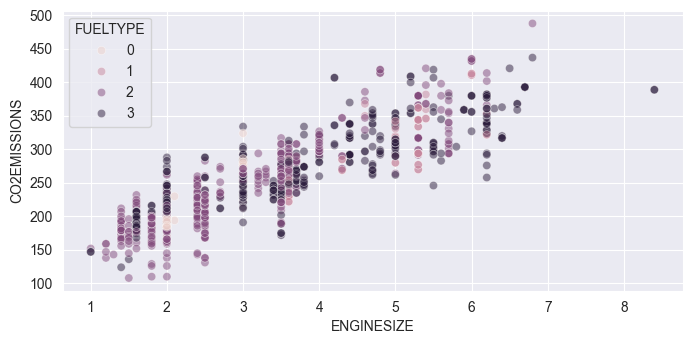

In [10]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', hue='FUELTYPE', data=data, alpha=0.5)



In [11]:
df

,MAKE,MODEL,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_mapped,FUEL_D,FUEL_E,FUEL_X,FUEL_Z
0,ACURA,ILX,2.0,4,AS5,9.9,6.7,8.5,33,196,4,0,0,0,1
1,ACURA,ILX,2.4,4,M6,11.2,7.7,9.6,29,221,4,0,0,0,1
2,ACURA,ILX HYBRID,1.5,4,AV7,6.0,5.8,5.9,48,136,4,0,0,0,1
3,ACURA,MDX 4WD,3.5,6,AS6,12.7,9.1,11.1,25,255,5,0,0,0,1
4,ACURA,RDX AWD,3.5,6,AS6,12.1,8.7,10.6,27,244,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,3.0,6,AS6,13.4,9.8,11.8,24,271,5,0,0,1,0
1063,VOLVO,XC60 AWD,3.2,6,AS6,13.2,9.5,11.5,25,264,5,0,0,1,0
1064,VOLVO,XC70 AWD,3.0,6,AS6,13.4,9.8,11.8,24,271,5,0,0,1,0
1065,VOLVO,XC70 AWD,3.2,6,AS6,12.9,9.3,11.3,25,260,5,0,0,1,0


In [12]:
lst = ['MODEL', 'MAKE', 'TRANSMISSION']
for any in lst:
    le = LabelEncoder()
    df[any] = le.fit_transform(df[any])

In [13]:
df

,MAKE,MODEL,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_mapped,FUEL_D,FUEL_E,FUEL_X,FUEL_Z
0,0,329,2.0,4,10,9.9,6.7,8.5,33,196,4,0,0,0,1
1,0,329,2.4,4,20,11.2,7.7,9.6,29,221,4,0,0,0,1
2,0,330,1.5,4,17,6.0,5.8,5.9,48,136,4,0,0,0,1
3,0,389,3.5,6,11,12.7,9.1,11.1,25,255,5,0,0,0,1
4,0,483,3.5,6,11,12.1,8.7,10.6,27,244,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,38,624,3.0,6,11,13.4,9.8,11.8,24,271,5,0,0,1,0
1063,38,624,3.2,6,11,13.2,9.5,11.5,25,264,5,0,0,1,0
1064,38,625,3.0,6,11,13.4,9.8,11.8,24,271,5,0,0,1,0
1065,38,625,3.2,6,11,12.9,9.3,11.3,25,260,5,0,0,1,0


In [14]:
df.describe()

,MAKE,MODEL,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_mapped,FUEL_D,FUEL_E,FUEL_X,FUEL_Z
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,17.223055,331.014995,3.346298,5.794752,9.670103,13.296532,9.474602,11.580881,26.441425,256.228679,4.597001,0.025305,0.086223,0.481724,0.406748
std,10.937264,188.664368,1.415895,1.797447,6.673143,4.101253,2.794510,3.485595,7.468702,63.372304,1.436822,0.157122,0.280825,0.499900,0.491457
min,0.000000,0.000000,1.000000,3.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,173.000000,2.000000,4.000000,2.000000,10.250000,7.500000,9.000000,21.000000,207.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,324.000000,3.400000,6.000000,11.000000,12.600000,8.800000,10.900000,26.000000,251.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,502.500000,4.300000,8.000000,13.000000,15.550000,10.850000,13.350000,31.000000,294.000000,6.000000,0.000000,0.000000,1.000000,1.000000
max,38.000000,662.000000,8.400000,12.000000,21.000000,30.200000,20.500000,25.800000,60.000000,488.000000,7.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.shape

(1067, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   int64  
 1   MODEL                     1067 non-null   int64  
 2   ENGINESIZE                1067 non-null   float64
 3   CYLINDERS                 1067 non-null   int64  
 4   TRANSMISSION              1067 non-null   int64  
 5   FUELCONSUMPTION_CITY      1067 non-null   float64
 6   FUELCONSUMPTION_HWY       1067 non-null   float64
 7   FUELCONSUMPTION_COMB      1067 non-null   float64
 8   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 9   CO2EMISSIONS              1067 non-null   int64  
 10  VEHICLECLASS_mapped       1067 non-null   int64  
 11  FUEL_D                    1067 non-null   int64  
 12  FUEL_E                    1067 non-null   int64  
 13  FUEL_X                    1067 non-null   int64  
 14  FUEL_Z  

['VEHICLECLASS_mapped',  'FUEL_D' , 'FUEL_E'  ,'FUEL_X',  'FUEL_Z', 'FUELCONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB' , 'FUELCONSUMPTION_COMB_MPG', 'MAKE',  'MODEL'  'ENGINESIZE' ,'CYLINDERS' , 'TRANSMISSION' , 'FUELCONSUMPTION_CITY']

In [17]:
df_copy = df.copy()
df_copy.drop(columns=['CO2EMISSIONS'], inplace=True)

In [18]:
X = df_copy.loc[:, :]
y = df['CO2EMISSIONS']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
y_train_pred_lin = model.predict(X_train)
y_test_pred_lin = model.predict(X_test)

In [22]:
train_target_series = pd.Series(y_train_pred_lin)
train_target_series

0      180.554149
1      294.961216
2      263.909946
3      263.312346
4      373.168538
          ...    
848    276.279986
849    231.232260
850    317.668864
851    198.092823
852    388.352429
Length: 853, dtype: float64

In [23]:
y_train

333     179
106     292
585     267
55      262
213     380
       ... 
330     276
466     230
121     317
1044    198
860     398
Name: CO2EMISSIONS, Length: 853, dtype: int64

In [24]:
w_lin = model.coef_
w_lin

array([-1.46011541e-02, -2.07707619e-04,  5.59444044e-01,  1.36961311e+00,
        2.04021029e-02, -4.35346671e+00, -2.74115573e+00,  2.52993649e+01,
       -1.49822339e+00, -1.38219785e-01,  5.28684773e+01, -9.15401809e+01,
        1.98784998e+01,  1.87932038e+01])

In [25]:
b = model.intercept_
b

np.float64(66.97611724311719)

In [26]:
equ = f'y = {w_lin}*X_train + b '
equ

'y = [-1.46011541e-02 -2.07707619e-04  5.59444044e-01  1.36961311e+00\n  2.04021029e-02 -4.35346671e+00 -2.74115573e+00  2.52993649e+01\n -1.49822339e+00 -1.38219785e-01  5.28684773e+01 -9.15401809e+01\n  1.98784998e+01  1.87932038e+01]*X_train + b '

In [27]:
X_tain_copy = X_train.copy()
X_train_copy_eng = X_train.ENGINESIZE.to_numpy()
X_train_copy_eng.reshape(-1, 1)

X_test_copy = X_test.copy()
X_test_copy_eng = X_test.ENGINESIZE.to_numpy()
X_test_copy_eng.reshape(-1, 1)

array([[4.7],
       [3.5],
       [3.6],
       [3. ],
       [2. ],
       [3. ],
       [3.6],
       [4. ],
       [5. ],
       [3.6],
       [3.6],
       [6.7],
       [3.2],
       [3.5],
       [3.6],
       [3.5],
       [1.6],
       [3.6],
       [1.6],
       [5.3],
       [5. ],
       [1.8],
       [3.2],
       [3.7],
       [3. ],
       [1.8],
       [2. ],
       [1.6],
       [5.5],
       [3.2],
       [5.4],
       [2.4],
       [1.8],
       [5. ],
       [3. ],
       [4.7],
       [4. ],
       [5.3],
       [2. ],
       [2.5],
       [1.6],
       [1.6],
       [1.4],
       [2.5],
       [4. ],
       [1.6],
       [3. ],
       [3. ],
       [2. ],
       [5.2],
       [6.2],
       [3.6],
       [2. ],
       [3.7],
       [3. ],
       [5.3],
       [5.3],
       [5.7],
       [2. ],
       [4.3],
       [4. ],
       [4.3],
       [4.4],
       [3.6],
       [1.6],
       [3.4],
       [1.4],
       [4.8],
       [3. ],
       [3.7],
       [5. ],
      

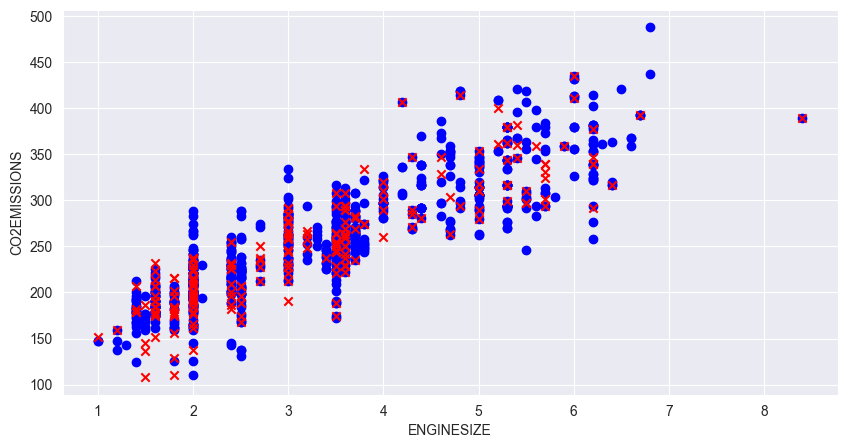

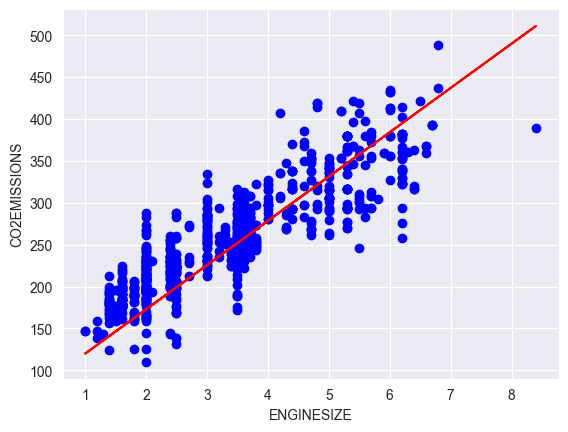

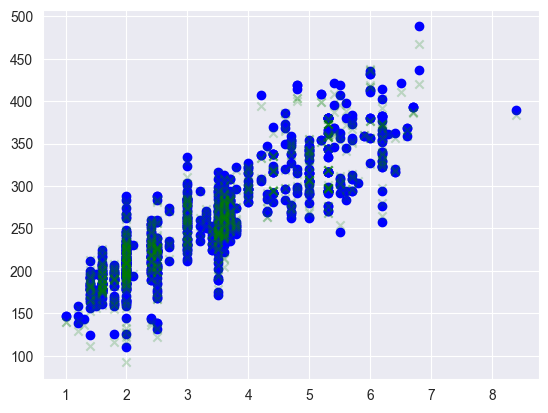

----------------------------------------
Test train Visualization
----------------------------------------


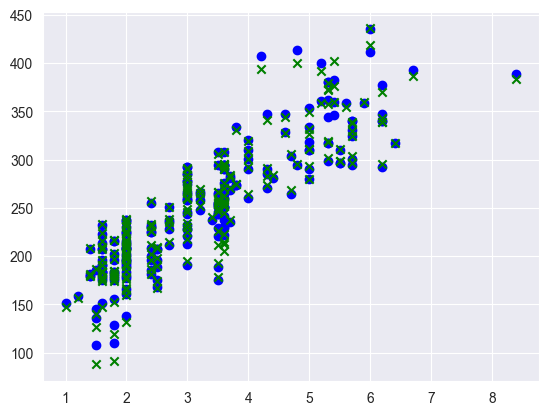

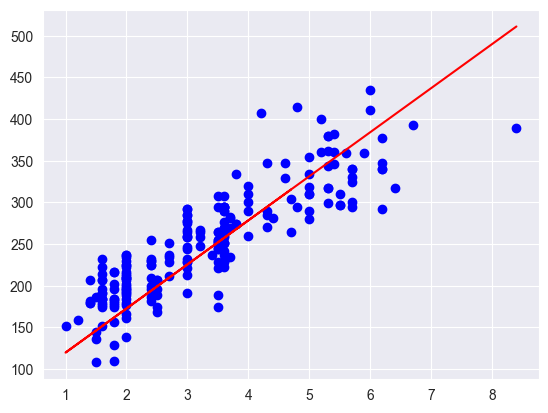

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train['ENGINESIZE'], y_train, color='blue', marker='o')
plt.scatter(X_test['ENGINESIZE'], y_test, color='red', marker='x')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

plt.scatter(X_train['ENGINESIZE'], y_train, color='blue', marker='o')
plt.plot(X_train['ENGINESIZE'], w_lin[10] * X_train_copy_eng + b, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

plt.scatter(X_train['ENGINESIZE'], y_train, color='blue', marker='o')
plt.scatter(X_train['ENGINESIZE'], y_train_pred_lin, color='green', marker='x', alpha=0.2)
plt.show()

print('-' * 40)
print('Test train Visualization')
print('-' * 40)

plt.scatter(X_test['ENGINESIZE'], y_test, color='blue', marker='o')
plt.scatter(X_test['ENGINESIZE'], y_test_pred_lin, color='green', marker='x')
plt.show()

plt.scatter(X_test['ENGINESIZE'], y_test, color='blue', marker='o')
plt.plot(X_test['ENGINESIZE'], w_lin[10] * X_test_copy_eng + b, color='red')
plt.show()

In [29]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

r2_train = r2_score(y_train, y_train_pred_lin)
r2_test = r2_score(y_test, y_test_pred_lin)

In [30]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [31]:
Poly_model = LinearRegression()
Poly_model.fit(poly_X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [32]:
y_train_pred_poly = Poly_model.predict(poly_X_train)
y_test_pred_poly = Poly_model.predict(poly_X_test)

In [33]:
w_poly= Poly_model.coef_
b = Poly_model.intercept_
w_poly,b

(array([-4.72493578e-09, -3.09168998e-02, -7.54820143e-04, -9.73857211e-01,
         3.67710936e-02,  1.00169186e-01,  3.52145437e-02,  7.88677389e-02,
         1.79130647e+01,  1.11869724e-01,  7.18140303e-01,  4.22207561e+00,
        -1.14871605e+00, -1.78486930e+00, -1.28849026e+00,  7.60291348e-05,
        -3.00748867e-06,  2.26472892e-03, -2.73504873e-03,  1.74762964e-04,
         6.25664193e-03,  4.99110095e-03, -8.69156095e-03,  5.81714499e-04,
        -2.61111852e-04, -1.17112367e-02, -7.07588551e-03, -8.30805792e-03,
        -3.82171985e-03,  5.35807803e-08,  1.31192620e-04, -1.58358166e-05,
         9.45619944e-06, -1.26350957e-03, -1.04913761e-03,  2.30687920e-03,
         3.39429288e-05, -6.64077381e-05, -2.08327429e-04,  1.04141818e-04,
        -3.82533875e-04, -2.68100493e-04,  3.93915249e-02, -8.40269482e-02,
         8.14875041e-03,  6.89540065e-01,  5.23862960e-01, -1.19278035e+00,
         9.55605992e-03, -5.75234913e-03, -2.96686536e+00,  1.02529654e+00,
         5.1

In [37]:
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

r2_test_poly = r2_score(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)

In [38]:
print('Model Comparison results:')
print(f'            Linear Regression       Polynomial Regression')
print('-' * 60)
print(
    f'RMSE     | Train: {rmse_train:.3f}   Test{rmse_test:.3f}   Train: {rmse_train_poly:.3f}   Test: {rmse_test_poly:.3f} ')
print(f'R2 score | Train:{r2_train:.3f}  Test:{r2_test:.3f}'
      f'    Train: {r2_train_poly:.3f}   Test: {r2_test_poly:.3f}')

Model Comparison results:
            Linear Regression       Polynomial Regression
------------------------------------------------------------
RMSE     | Train: 5.352   Test5.706   Train: 0.265   Test: 0.296 
R2 score | Train:0.993  Test:0.992    Train: 1.000   Test: 1.000


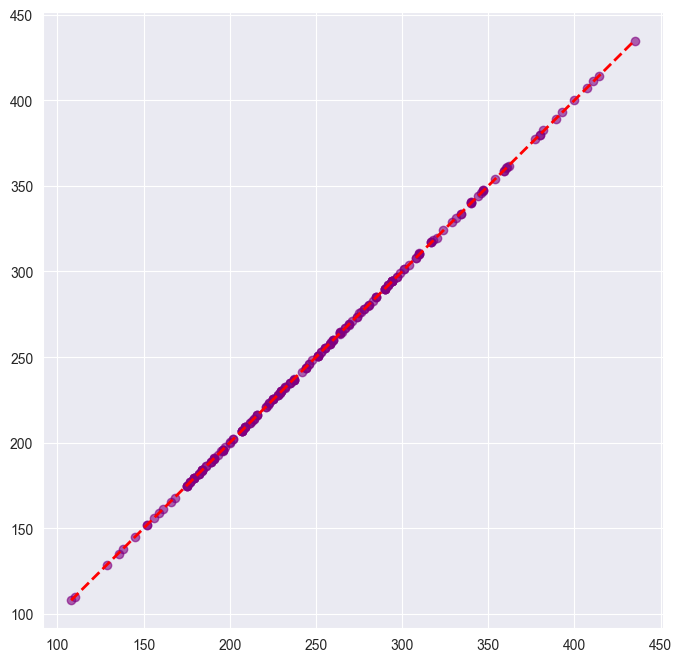

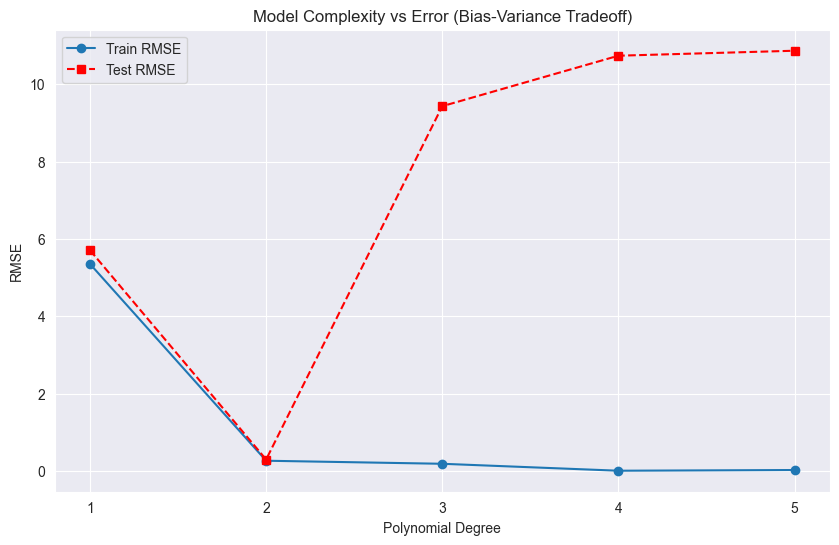

In [39]:
degrees = range(1, 6)
train_rmse_list = []
test_rmse_list = []

for d in degrees:
    pf = PolynomialFeatures(degree=d)
    p_X_train = pf.fit_transform(X_train)
    p_X_test = pf.transform(X_test)

    lr = LinearRegression()
    lr.fit(p_X_train, y_train)

    train_pred = lr.predict(p_X_train)
    test_pred = lr.predict(p_X_test)

    train_rmse_list.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse_list.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred_poly, alpha=0.6, color='purple', label='Predictions')
# Diagonal line for perfect prediction
min_val = min(y_test.min(), y_test_pred_poly.min())
max_val = max(y_test.max(), y_test_pred_poly.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Fit')

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse_list, label='Train RMSE', marker='o', linestyle='-')
plt.plot(degrees, test_rmse_list, label='Test RMSE', marker='s', linestyle='--', color='red')
plt.title('Model Complexity vs Error (Bias-Variance Tradeoff)')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

Large overfit for degrees higher than 2